<a href="https://colab.research.google.com/github/Reshmykris/Day13_DS_ML/blob/main/SVR_Day13_DS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv("/content/Position_Salaries.csv")

In [17]:
x = dataset.iloc[:, 1 :-1].values  #levels is the only thing considering
y = dataset.iloc[:, -1].values

print(y)    #row form

y = y.reshape(len(y),1)  #need to reshape the sal, matrix format

y

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [11]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [12]:
#Training the SVR model on whole dataset

from sklearn.svm import SVR

regressor = SVR(kernel = "rbf")

regressor.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
#Predict the values with new variables

sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([0.01150915])

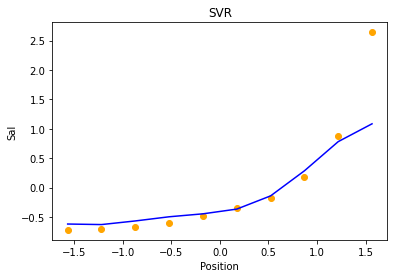

In [15]:
#Visualize the training set results

plt.scatter(sc_x.transform(x), sc_y.transform(y), color = "orange")

plt.plot(sc_x.transform(x), sc_y.inverse_transform(regressor.predict(x)), color = "blue" )

plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Sal")

plt.show()